# Explore datasets

In [75]:
#Change root directory to the project root
#This is necessary to import modules from the project
#without having to install them

import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
import pandas as pd
import numpy as np

bb_motifs_local = pd.read_csv('../data/bb_motifs_local.csv.bz2', compression='bz2')
bb_motifs_by_strandaxis = pd.read_csv('../data/bb_motifs_by_strandaxis.csv.bz2', compression='bz2')
ab_motifs = pd.read_csv('../data/ab_motifs.csv.bz2', compression='bz2')
ba_motifs = pd.read_csv('../data/ba_motifs.csv.bz2', compression='bz2')

# Filtering for hairpins with defining vectors being close to orthogonal
bb_motifs_local_filtered = bb_motifs_local[np.abs(bb_motifs_local.handedness_magnitude) > 0.75]
bb_motifs_by_strandaxis_filtered = bb_motifs_by_strandaxis[np.abs(bb_motifs_by_strandaxis.handedness_magnitude) > 0.75]
ab_motifs_filtered = ab_motifs[ab_motifs['orientation_magnitude'] > 0.75]
ba_motifs_filtered = ba_motifs[ba_motifs['orientation_magnitude'] > 0.75]

In [91]:
ba_motifs_filtered

,Chain,strand_start_res,strand_end_res,helix_start_res,helix_end_res,loop_len,FullChainSequence,PDB,orientation,orientation_magnitude
3,A,156,159,163,170,3,MASRILLNNGAKMPILGLGTWKSPPGQVTEAVKVAIDVGYRHIDCA...,1us0,A,0.982177
12,A,28,31,35,42,3,HGSMETPPSRVYGCFLEGPENPKSAACKAAVAAGGTQALYDWNGVN...,8c5n,A,0.949549
17,A,86,91,94,110,2,SMSEQSICQARAAVMVYDDANKKWVPAGGSTGFSRVHIYHHTGNNT...,7a5m,P,0.887017
18,A,1220,1221,1226,1232,4,STPAITLENPDIKYPLRLIDKEVVNHDTRRFRFALPSPEHILGLPV...,5gv8,A,0.779069
21,A,190,194,198,206,3,RIPGFDISGWQPTTDFARAYANGDRFVYIKATEGTTFKSSAFSRQY...,6zm8,P,0.784139
...,...,...,...,...,...,...,...,...,...,...
39267,B,130,135,138,157,2,RPFQAGELILAETKFKKLFRLNKIVGKFPGQILRSQYMLRRPALED...,2b25,P,0.783725
39268,B,207,217,220,232,2,RPFQAGELILAETKFKKLFRLNKIVGKFPGQILRSQYMLRRPALED...,2b25,P,0.755809
39270,A,128,132,137,143,4,QDRDVQLSKALSYALRHGALKLGLPMGADGFVPLGTLLQLPQFRGF...,7yw3,P,0.839991
39282,A,61,68,71,74,2,QQLYCTVVLWDLSRSAATVASLRAYLRDHAVDAYTTVPGLRQKTWI...,4za1,P,0.942206


# Plot

Text(0, 0.5, '')

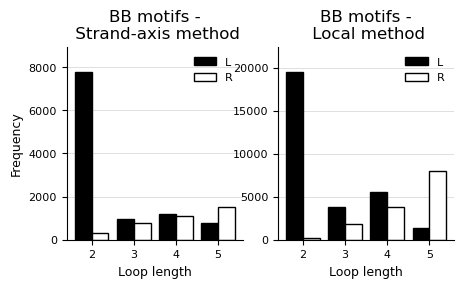

In [99]:
from dataset.plots import plot_loop_length_category

fig,ax = plt.subplots(1, 2, figsize=(5, 2.5))
plot_loop_length_category(bb_motifs_by_strandaxis_filtered, ax=ax[0])   
plot_loop_length_category(bb_motifs_local_filtered, ax=ax[1]) 
ax[0].set_title("BB motifs -\n Strand-axis method") 
ax[1].set_title("BB motifs -\n Local method"); ax[1].set_ylabel(None)

Text(0, 0.5, '')

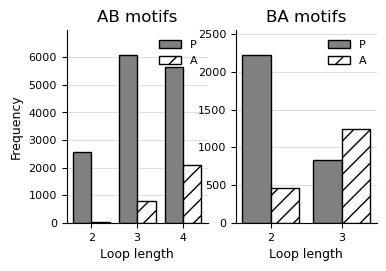

In [100]:
fig,ax = plt.subplots(1, 2, figsize=(4, 2.5))
plot_loop_length_category(ab_motifs_filtered, ax=ax[0], loop_lengths=[2,3,4], category_col="orientation")
ax[0].set_title("AB motifs")
plot_loop_length_category(ba_motifs_filtered, ax=ax[1], loop_lengths=[2,3], category_col="orientation")
ax[1].set_title("BA motifs"); ax[1].set_ylabel(None)

### What sequence is most common in beta-hairpin loops?

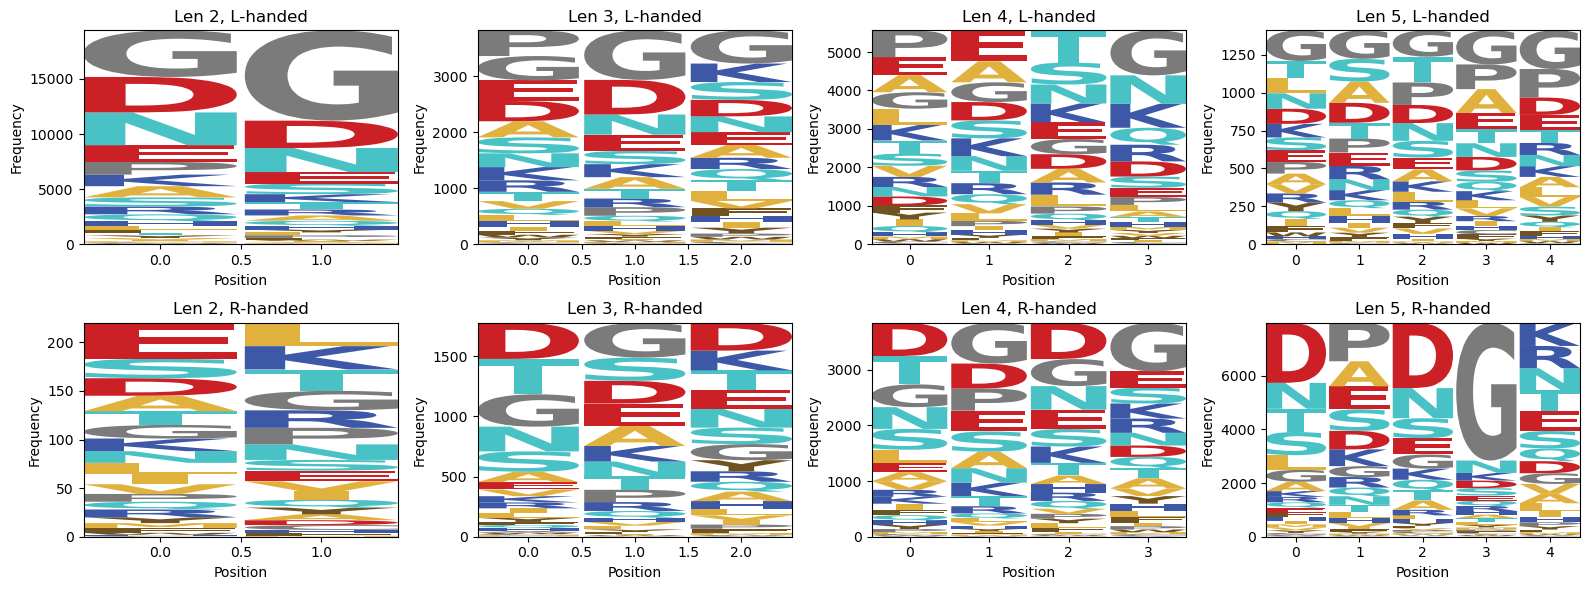

In [92]:
import logomaker
import matplotlib.pyplot as plt

# Define your grouped color scheme
grouped_colors = {
    '#e1b13e': 'MILAV',
    '#49c2c6': 'STNQ',
    '#cb2026': 'DE',
    '#3e58a8': 'KRH',
    '#715321': 'FYW',
    '#7b7b7b': 'GPCX'
}
aa_color_dict = {
    aa: color for color, aas in grouped_colors.items() for aa in aas
}

# Set up the grid: 2 rows (L/R) x 4 columns (loop lengths)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
loop_lengths = [2, 3, 4, 5]
handednesses = ['L', 'R']

for row_idx, handedness in enumerate(handednesses):
    for col_idx, looplength in enumerate(loop_lengths):
        ax = axes[row_idx, col_idx]
        bb_motifs_local_filtered = df[(df['handedness'] == handedness) & (df['loop_len'] == looplength)]
        loop_seqs = bb_motifs_local_filtered['LoopSequence'].dropna().astype(str).tolist()

        if loop_seqs:
            counts_mat = logomaker.alignment_to_matrix(loop_seqs)
            logo = logomaker.Logo(counts_mat, ax=ax, color_scheme=aa_color_dict)
            ax.set_title(f'Len {looplength}, {handedness}-handed')
            ax.set_xlabel('Position')
            ax.set_ylabel('Frequency')
        else:
            ax.axis('off')
            ax.set_title(f'Len {looplength}, {handedness}-handed\n(No data)')

plt.tight_layout()
plt.show()


In [97]:
# import logomaker
# import matplotlib.pyplot as plt

# # Define your grouped color scheme
# grouped_colors = {
#     '#e1b13e': 'MILAV',
#     '#49c2c6': 'STNQ',
#     '#cb2026': 'DE',
#     '#3e58a8': 'KRH',
#     '#715321': 'FYW',
#     '#7b7b7b': 'GPCX'
# }
# aa_color_dict = {
#     aa: color for color, aas in grouped_colors.items() for aa in aas
# }

# # Set up the grid: 2 rows (L/R) x 4 columns (loop lengths)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
# loop_lengths = [2, 3, 4]
# orientation = ['P', 'A']

# for row_idx, handedness in enumerate(orientation):
#     for col_idx, looplength in enumerate(loop_lengths):
#         ax = axes[row_idx, col_idx]
#         ba_motifs_filtered2 = ba_motifs_filtered[(ba_motifs_filtered['orientation'] == orientation) & (ba_motifs_filtered['loop_len'] == looplength)]
#         loop_seqs = ba_motifs_filtered2['LoopSequence'].dropna().astype(str).tolist()

#         if loop_seqs:
#             counts_mat = logomaker.alignment_to_matrix(loop_seqs)
#             logo = logomaker.Logo(counts_mat, ax=ax, color_scheme=aa_color_dict)
#             ax.set_title(f'Len {looplength}, {orientation}-handed')
#             ax.set_xlabel('Position')
#             ax.set_ylabel('Frequency')
#         else:
#             ax.axis('off')
#             ax.set_title(f'Len {looplength}, {orientation}-handed\n(No data)')

# plt.tight_layout()
# plt.show()
